<div style="text-align:center">
 <h2>NNDL LAB</h2>
 <p> LAB 6 </p>
</div>
<p>Name: Kushal Sourav B</p>
<p>Regno: 2347125 </p>

In [21]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('./HistoricalQuotes.csv') 
data = data[[' Close/Last']]

data


,Close/Last
0,$273.36
1,$273.52
2,$292.65
3,$288.08
4,$298.18
...,...
2513,$31.2786
2514,$30.1014
2515,$29.9043
2516,$29.8357


* cleaned the Close/Last column by removing dollar signs and commas, converting it to a numeric format.
* applied Min-Max Scaling to normalize the Close prices between 0 and 1 for better model performance.
* extracted the normalized Close prices into a NumPy array for easy input into a model.








In [25]:
data['Close'] = data[' Close/Last'].replace('[\$,]', '', regex=True).astype(float)

scaler = MinMaxScaler(feature_range=(0, 1))
data['Close'] = scaler.fit_transform(data[['Close']])

close_prices = data['Close'].values
close_prices


array([8.18942624e-01, 8.19480684e-01, 8.83812549e-01, ...,
       2.30693463e-04, 0.00000000e+00, 6.72575693e-05])

* split the data into training and testing sets, using 80% of the close_prices for training and the remaining 20% for testing.
* The training data consists of the first 80% of the close_prices, and the testing data includes the remaining 20%.
* assigned the first 80% of the close_prices to train_data and the rest to test_data for model evaluation.

In [26]:
train_size = int(len(close_prices) * 0.8)
train_data = close_prices[:train_size]
test_data = close_prices[train_size:]


train_size, train_data, test_data

(2014,
 array([0.81894262, 0.81948068, 0.88381255, ..., 0.16123556, 0.16026033,
        0.15688299]),
 array([1.52246924e-01, 1.50637787e-01, 1.47745711e-01, 1.46136238e-01,
        1.47005878e-01, 1.40890147e-01, 1.40933528e-01, 1.38752365e-01,
        1.44416462e-01, 1.41120841e-01, 1.36710762e-01, 1.36590371e-01,
        1.28668438e-01, 1.24897306e-01, 1.22562460e-01, 1.20501688e-01,
        1.18310772e-01, 1.18824956e-01, 1.18964180e-01, 1.17297201e-01,
        1.14544348e-01, 1.13271499e-01, 1.14246734e-01, 1.01635939e-01,
        1.04998145e-01, 1.01582806e-01, 1.05161918e-01, 1.05815325e-01,
        1.03696711e-01, 1.01347405e-01, 1.02106742e-01, 1.02663971e-01,
        1.02995215e-01, 1.02269842e-01, 1.02591670e-01, 1.00492561e-01,
        9.82871851e-02, 9.72255244e-02, 9.42325626e-02, 9.42904041e-02,
        9.30989362e-02, 9.49676878e-02, 9.34305160e-02, 9.11340063e-02,
        9.01227888e-02, 8.98850333e-02, 8.32840391e-02, 8.27123498e-02,
        8.17132386e-02, 8.23135124


* defined a function create_sequences to transform the data into sequences: each sequence (x) is a window of sequence_length (default 60) previous values, with the following value as the target (y).
* applied this function to create x_train, y_train, x_test, and y_test by generating sequences from train_data and test_data, preparing the data for time-series modeling.
* Finally converted x_train, y_train, x_test, and y_test to float32 format for compatibility with neural networks.

In [27]:
import numpy as np

def create_sequences(data, sequence_length=60):
    x, y = [], []
    for i in range(sequence_length, len(data)):
        x.append(data[i-sequence_length:i])
        y.append(data[i])
    return np.array(x), np.array(y)

x_train, y_train = create_sequences(train_data)
x_test, y_test = create_sequences(test_data)


x_train = x_train.astype(np.float32)
y_train = y_train.astype(np.float32)
x_test = x_test.astype(np.float32)
y_test = y_test.astype(np.float32)


x_train, y_train,x_test, y_test


(array([[0.8189426 , 0.81948066, 0.88381255, ..., 0.79277945, 0.779866  ,
         0.772165  ],
        [0.81948066, 0.88381255, 0.8684442 , ..., 0.779866  , 0.772165  ,
         0.78800416],
        [0.88381255, 0.8684442 , 0.90240926, ..., 0.772165  , 0.78800416,
         0.79839545],
        ...,
        [0.16979644, 0.17125224, 0.17376934, ..., 0.15440892, 0.15580216,
         0.16157655],
        [0.17125224, 0.17376934, 0.16724065, ..., 0.15580216, 0.16157655,
         0.16123556],
        [0.17376934, 0.16724065, 0.16931118, ..., 0.16157655, 0.16123556,
         0.16026032]], dtype=float32),
 array([0.78800416, 0.79839545, 0.8003795 , ..., 0.16123556, 0.16026032,
        0.15688299], dtype=float32),
 array([[0.15224692, 0.15063779, 0.14774571, ..., 0.08688232, 0.08603218,
         0.08327933],
        [0.15063779, 0.14774571, 0.14613624, ..., 0.08603218, 0.08327933,
         0.07895568],
        [0.14774571, 0.14613624, 0.14700587, ..., 0.08327933, 0.07895568,
         0.0803583

* reshaped x_train and x_test to have three dimensions, where the last dimension is 1, making them suitable for LSTM and other neural network models that expect 3D input.
* The reshaping format is (samples, sequence_length, features), with 1 feature per timestep in each sequence.
* x_train and x_test are ready in 3D format, compatible with models like LSTM.

In [28]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

x_train, x_test

(array([[[0.8189426 ],
         [0.81948066],
         [0.88381255],
         ...,
         [0.79277945],
         [0.779866  ],
         [0.772165  ]],
 
        [[0.81948066],
         [0.88381255],
         [0.8684442 ],
         ...,
         [0.779866  ],
         [0.772165  ],
         [0.78800416]],
 
        [[0.88381255],
         [0.8684442 ],
         [0.90240926],
         ...,
         [0.772165  ],
         [0.78800416],
         [0.79839545]],
 
        ...,
 
        [[0.16979644],
         [0.17125224],
         [0.17376934],
         ...,
         [0.15440892],
         [0.15580216],
         [0.16157655]],
 
        [[0.17125224],
         [0.17376934],
         [0.16724065],
         ...,
         [0.15580216],
         [0.16157655],
         [0.16123556]],
 
        [[0.17376934],
         [0.16724065],
         [0.16931118],
         ...,
         [0.16157655],
         [0.16123556],
         [0.16026032]]], dtype=float32),
 array([[[0.15224692],
         [0.15063


* created a Sequential model with a SimpleRNN layer of 50 units and ReLU activation, suitable for time-series data processing.
* The input shape for the SimpleRNN layer is set to (sequence_length, 1), matching the shape of x_train.
* added a Dense layer with 1 unit as the output layer to predict a single value for each sequence.

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(x_train.shape[1], 1)),
    Dense(1)
])


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


* compiled the model using the Adam optimizer, which adapts learning rates during training for efficient convergence.
* set the loss function to Mean Squared Error, ideal for regression tasks like time-series forecasting.


In [30]:
model.compile(optimizer='adam', loss='mean_squared_error')


* trained the model on x_train and y_train for 50 epochs, with a batch size of 32 to control updates per training batch.
* included validation_data as (x_test, y_test) to monitor the model’s performance on unseen data after each epoch.
* This setup tracks training progress and helps prevent overfitting by using both training and validation data.

In [31]:
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0228 - val_loss: 9.7903e-04
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.7303e-04 - val_loss: 2.0708e-05
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 9.0496e-05 - val_loss: 1.2874e-05
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.1938e-05 - val_loss: 1.3887e-05
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.0532e-05 - val_loss: 1.6519e-05
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.5846e-05 - val_loss: 1.2287e-05
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 9.3494e-05 - val_loss: 1.3019e-05
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8.7416e-05 - val_loss: 1.2226e-05
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8.4403e-05 - val_loss: 1.3889e-05
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.6141e-05 - val_loss: 3.0730e-05
Epoch 11/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 8.7487e-05 - val_los

* generated predictions on the x_test data using the trained model.
* used scaler.inverse_transform to convert the predictions back to their original scale, making them comparable to the actual prices.
* Similarly, transformed y_test back to the original scale, providing the true values for comparison with the predictions.

In [32]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


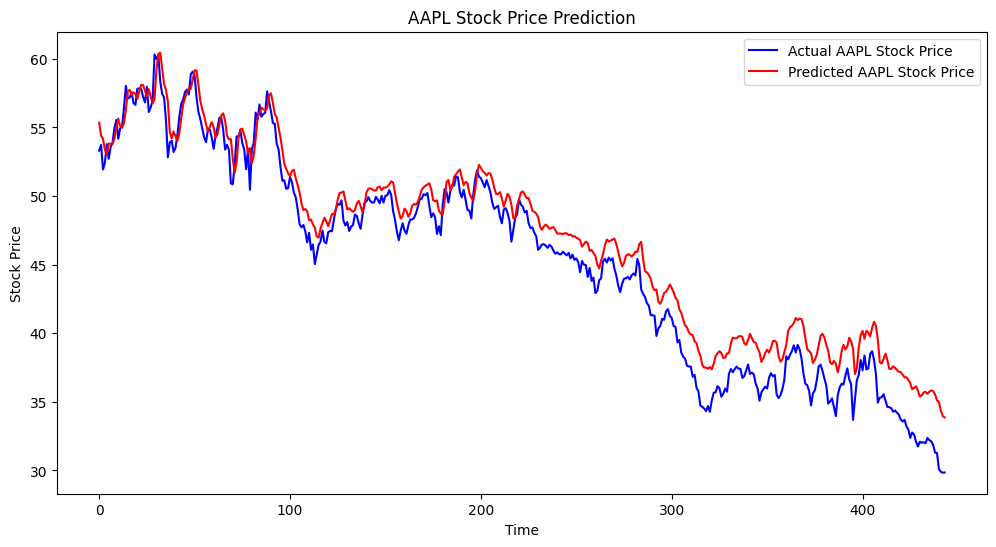

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(actual_prices, color='blue', label='Actual AAPL Stock Price')
plt.plot(predictions, color='red', label='Predicted AAPL Stock Price')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


* evaluated the model's performance by calculating Mean Absolute Error (MAE), which measures the average absolute difference between predicted and actual prices.
* calculated Root Mean Squared Error (RMSE) by taking the square root of Mean Squared Error, providing insight into the model’s prediction accuracy.


In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(actual_prices, predictions)
rmse = np.sqrt(mean_squared_error(actual_prices, predictions))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")


MAE: 1.7192814350128174
RMSE: 2.009431838989258
